Visualizing results

High pass:

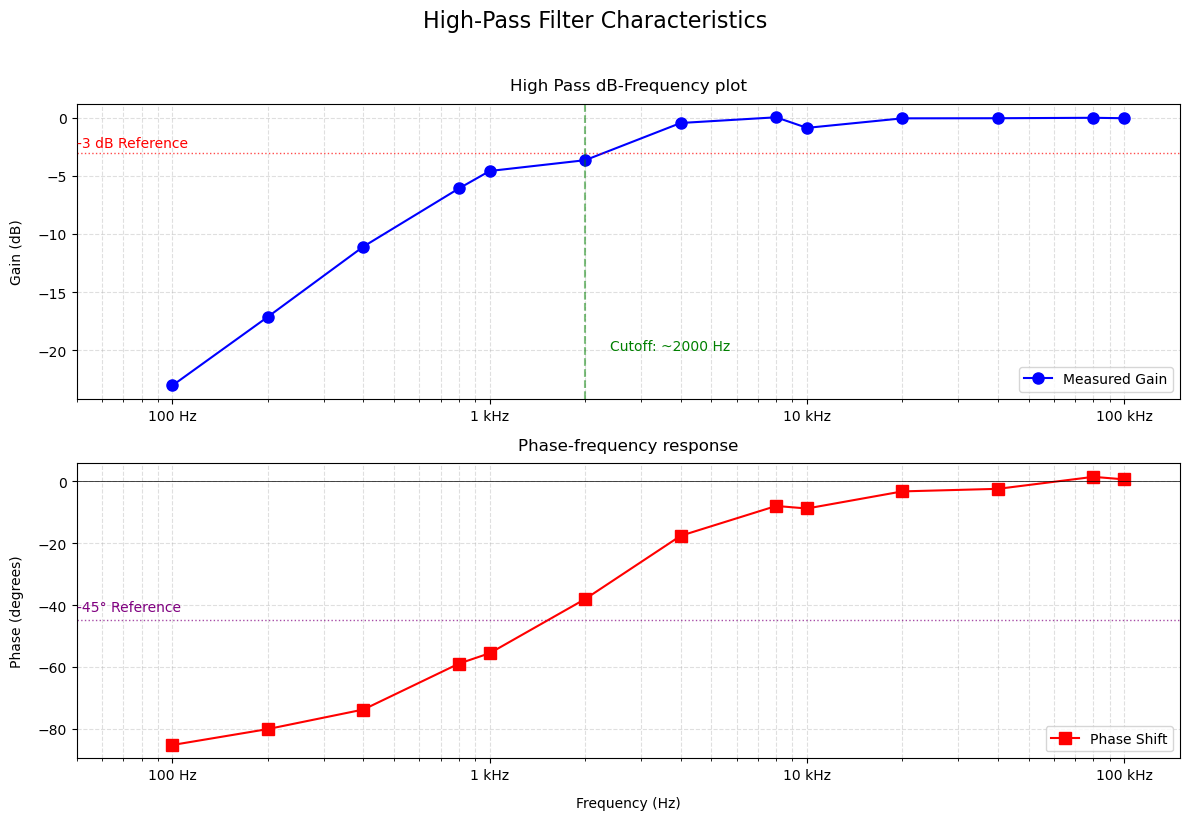

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import EngFormatter

# Data from your CSV
data = {
    "Frequency (Hz)": [100, 200, 400, 800, 1000, 2000, 4000, 8000, 10000, 20000, 40000, 80000, 100000],
    "Amplitude Vin (mV)": [986.9, 966.5, 960.0, 790.7, 760.2, 616.5, 506.1, 489.5, 544.0, 507.1, 505.8, 506.8, 511.1],
    "Amplitude Vout (mV)": [69.62, 134.6, 268.0, 392.5, 448.5, 405.0, 480.5, 491.5, 492.0, 504.1, 503.6, 506.6, 508.7],
    "Phase Shift (degrees)": [-85.22, -80.07, -73.76, -58.93, -55.57, -38.06, -17.64, -8.005, -8.823, -3.297, -2.474, 1.4, 0.589],
    "Gain (dB)": [-23.03, -17.12, -11.08, -6.08, -4.58, -3.65, -0.45, 0.04, -0.87, -0.05, -0.04, -0.003, -0.04]
}

df = pd.DataFrame(data)

# Create figure with two subplots
plt.figure(figsize=(12, 8))
plt.suptitle('High-Pass Filter Characteristics', y=1.02, fontsize=16)

# Plot 1: Gain vs Frequency (Top plot)
plt.subplot(2, 1, 1)
plt.semilogx(df["Frequency (Hz)"], df["Gain (dB)"], 'bo-', 
             linewidth=1.5, markersize=8, markerfacecolor='blue', 
             label='Measured Gain')

# Formatting
plt.title('High Pass dB-Frequency plot', pad=10)
plt.ylabel('Gain (dB)', labelpad=10)
plt.grid(True, which="both", linestyle="--", alpha=0.4)

# Add -3dB cutoff line and label
plt.axhline(-3, color='red', linestyle=':', linewidth=1, alpha=0.7)
plt.text(50, -2.5, '-3 dB Reference', color='red')

# Estimate and mark cutoff frequency
cutoff_idx = np.argmin(np.abs(df["Gain (dB)"] - (-3)))
cutoff_freq = df["Frequency (Hz)"][cutoff_idx]
plt.axvline(cutoff_freq, color='green', linestyle='--', alpha=0.5)
plt.text(cutoff_freq*1.2, -20, f'Cutoff: ~{cutoff_freq} Hz', color='green')

# Plot 2: Phase Shift vs Frequency (Bottom plot)
plt.subplot(2, 1, 2)
plt.semilogx(df["Frequency (Hz)"], df["Phase Shift (degrees)"], 'rs-', 
             linewidth=1.5, markersize=8, markerfacecolor='red', 
             label='Phase Shift')

# Formatting
plt.title('Phase-frequency response', pad=10)
plt.xlabel('Frequency (Hz)', labelpad=10)
plt.ylabel('Phase (degrees)', labelpad=10)
plt.grid(True, which="both", linestyle="--", alpha=0.4)

# Add phase reference lines
plt.axhline(-45, color='purple', linestyle=':', linewidth=1, alpha=0.7)
plt.text(50, -42, '-45° Reference', color='purple')
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

# Set consistent x-axis for both plots
for ax in plt.gcf().axes:
    ax.set_xlim(50, 150000)
    ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Low Pass:

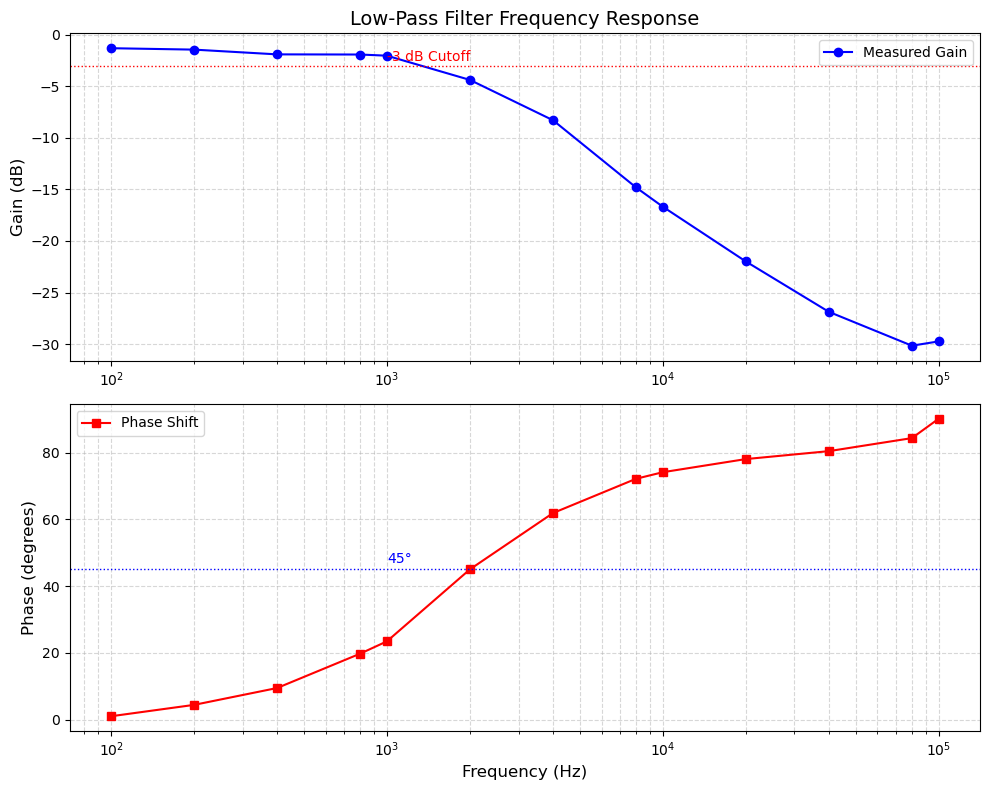

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from your CSV
data = {
    "Frequency (Hz)": [100, 200, 400, 800, 1000, 2000, 4000, 8000, 10000, 20000, 40000, 80000, 100000],
    "Amplitude Vin (mV)": [576, 535.6, 607, 608, 616, 728, 872, 940, 966, 997.4, 999.4, 966.1, 873],
    "Amplitude Vout (mV)": [496.1, 454.1, 488, 488, 488, 440, 336, 171, 141.7, 79.37, 45.3, 30, 28.44],
    "Phase Shift (degrees)": [0.9912, 4.401, 9.46, 19.76, 23.45, 45.05, 61.92, 72.2, 74.17, 78.11, 80.49, 84.4, 90.2],
    "Gain (dB)": [-1.297, -1.434, -1.895, -1.910, -2.023, -4.374, -8.284, -14.803, -16.672, -21.984, -26.873, -30.158, -29.742]
}

df = pd.DataFrame(data)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: Gain vs Frequency (Bode Magnitude Plot)
ax1.semilogx(df["Frequency (Hz)"], df["Gain (dB)"], 'bo-', linewidth=1.5, markersize=6, label='Measured Gain')
ax1.set_title('Low-Pass Filter Frequency Response', fontsize=14)
ax1.set_ylabel('Gain (dB)', fontsize=12)
ax1.grid(True, which="both", linestyle="--", alpha=0.5)
ax1.legend()

# Add -3dB cutoff line and label
ax1.axhline(-3, color='r', linestyle=':', linewidth=1)
ax1.annotate('-3 dB Cutoff', (1000, -2.5), color='r')

# Plot 2: Phase Shift vs Frequency (Bode Phase Plot)
ax2.semilogx(df["Frequency (Hz)"], df["Phase Shift (degrees)"], 'rs-', linewidth=1.5, markersize=6, label='Phase Shift')
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Phase (degrees)', fontsize=12)
ax2.grid(True, which="both", linestyle="--", alpha=0.5)
ax2.legend()

# Add 45° phase shift reference
ax2.axhline(45, color='b', linestyle=':', linewidth=1)
ax2.annotate('45°', (1000, 47), color='b')

plt.tight_layout()
plt.show()